In [1]:
import tensorflow

In [2]:
from tensorflow import keras

In [3]:
(X_train,y_train),(X_test,y_test)=keras.datasets.mnist.load_data()

In [4]:
len(X_train)

60000

In [5]:
len(X_test)

10000

In [6]:
X_train[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

In [7]:
%matplotlib inline 
import matplotlib.pyplot as plt

<Figure size 640x480 with 0 Axes>

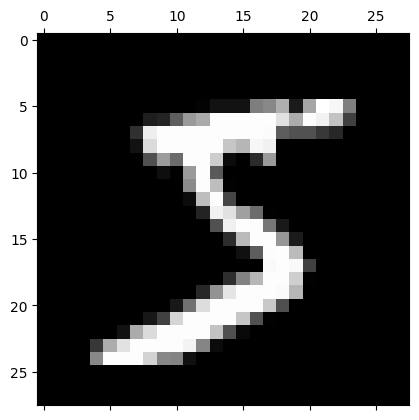

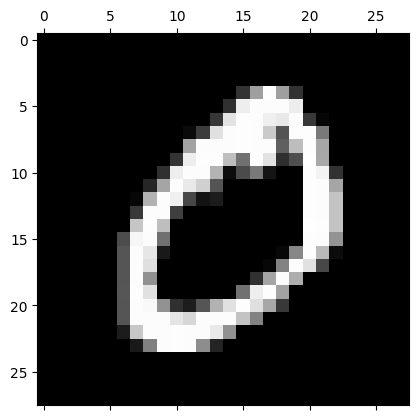

In [8]:
plt.gray()
plt.matshow(X_train[0])
plt.matshow(X_train[1])

In [9]:
y_train[0:5]

array([5, 0, 4, 1, 9], dtype=uint8)

# flatten the training dataset

In [10]:
import pandas as pd

In [11]:
X_train.shape

(60000, 28, 28)

In [12]:
X_train=X_train/255
X_test=X_test/255

In [13]:
X_train_flattened=X_train.reshape(len(X_train),28*28)

In [14]:
X_train_flattened.shape

(60000, 784)

In [15]:
X_test_flattened=X_test.reshape(len(X_test),28*28)

In [16]:
X_test_flattened.shape

(10000, 784)

# Create a simple neural network

In [17]:
model = keras.Sequential([
    keras.layers.Dense(10,input_shape=(784,),activation='sigmoid')
])

model.compile(optimizer = 'adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy']
)

model.fit(X_train_flattened,y_train,epochs=5)

Epoch 1/5
1875/1875 [==============================] - 5s 1ms/step - loss: 0.4659 - accuracy: 0.8783
Epoch 2/5
1875/1875 [==============================] - 2s 1ms/step - loss: 0.3035 - accuracy: 0.9153
Epoch 3/5
1875/1875 [==============================] - 2s 1ms/step - loss: 0.2833 - accuracy: 0.9205
Epoch 4/5
1875/1875 [==============================] - 2s 1ms/step - loss: 0.2727 - accuracy: 0.9237
Epoch 5/5
1875/1875 [==============================] - 2s 1ms/step - loss: 0.2663 - accuracy: 0.9254


In [18]:
model.evaluate(X_test_flattened,y_test)

313/313 [==============================] - 1s 1ms/step - loss: 0.2673 - accuracy: 0.9260


[0.267315536737442, 0.9259999990463257]

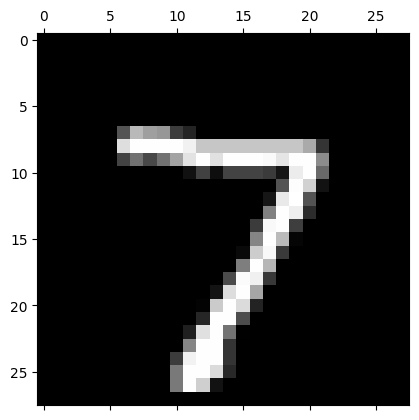

In [20]:
plt.matshow(X_test[0])

In [27]:
predicted = model.predict(X_test_flattened)

313/313 [==============================] - 0s 850us/step


In [28]:
predicted[0]

array([2.5136305e-02, 3.6554729e-07, 5.6967646e-02, 9.5122528e-01,
       3.6360957e-03, 1.0713670e-01, 1.6347104e-06, 9.9968380e-01,
       9.1489494e-02, 7.3111051e-01], dtype=float32)

In [31]:
predicted_labels = [np.argmax(i) for i in predicted]

In [32]:
import numpy as np
np.argmax(predicted[0])

7

In [41]:
cm = tensorflow.math.confusion_matrix(labels=y_test,predictions=predicted_labels)
cm

<tf.Tensor: shape=(10, 10), dtype=int32, numpy=
array([[ 962,    0,    2,    2,    0,    5,    6,    2,    1,    0],
       [   0, 1117,    3,    2,    0,    1,    4,    2,    6,    0],
       [   6,    9,  923,   18,    9,    3,   13,    8,   39,    4],
       [   3,    0,   19,  916,    1,   25,    2,   10,   24,   10],
       [   1,    1,    3,    1,  918,    0,   11,    3,    9,   35],
       [  11,    3,    3,   29,   11,  778,   16,    4,   29,    8],
       [  13,    3,    7,    1,    8,   12,  911,    2,    1,    0],
       [   1,    5,   26,    5,    9,    1,    0,  931,    2,   48],
       [   6,    8,    6,   20,    9,   25,    9,    9,  869,   13],
       [  11,    7,    1,    9,   26,    7,    0,    8,    5,  935]])>

In [38]:
import seaborn as sb

<AxesSubplot: >

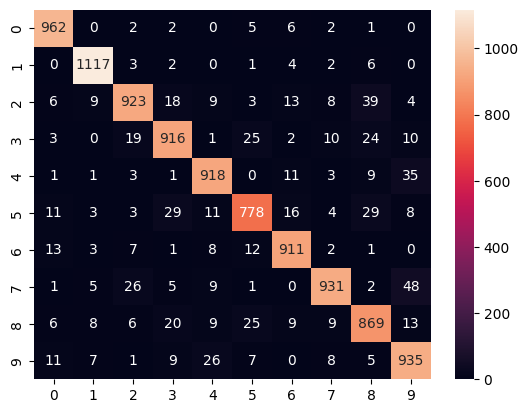

In [42]:
sb.heatmap(cm,annot=True,fmt='d')

##### Add a Hidden Layer

In [46]:
model = keras.Sequential([
    keras.layers.Dense(100,input_shape=(784,),activation='relu'),
    keras.layers.Dense(10,activation='sigmoid')
])

model.compile(optimizer = 'adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy']
)

model.fit(X_train_flattened,y_train,epochs=5)

Epoch 1/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2784 - accuracy: 0.9207
Epoch 2/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.1271 - accuracy: 0.9629
Epoch 3/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0896 - accuracy: 0.9730
Epoch 4/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0681 - accuracy: 0.9787
Epoch 5/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0537 - accuracy: 0.9834


In [47]:
model.evaluate(X_test_flattened,y_test)

313/313 [==============================] - 1s 1ms/step - loss: 0.0868 - accuracy: 0.9728


[0.08675464987754822, 0.9728000164031982]

##### Flatten within model

In [51]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28,28)),
    keras.layers.Dense(100,activation='relu'),
    keras.layers.Dense(10,activation='sigmoid')
])

model.compile(optimizer = 'adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy']
)

model.fit(X_train,y_train,epochs=5)

Epoch 1/5
1875/1875 [==============================] - 7s 4ms/step - loss: 0.2740 - accuracy: 0.9218
Epoch 2/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.1249 - accuracy: 0.9629
Epoch 3/5
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0870 - accuracy: 0.9739
Epoch 4/5
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0659 - accuracy: 0.9803
Epoch 5/5
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0528 - accuracy: 0.9835
